In [37]:
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
df = pd.read_csv("data/shoe_sales.csv")

In [3]:
df.head()

,date,brand,sold_qty
0,9/1/2023,Nike,24.0
1,9/1/2023,Adidas,14.0
2,9/2/2023,Nike,21.0
3,9/2/2023,Adidas,12.0
4,9/3/2023,Nike,18.0


In [4]:
df.describe()

,sold_qty
count,58.000000
mean,27.482759
std,88.519844
min,7.000000
25%,12.250000
50%,16.000000
75%,19.750000
max,689.000000


In [6]:
# We will get 25 Percentile data- 25% value is 12.25
df_25_percentile = df[df['sold_qty'] < 12.25]

In [7]:
df_25_percentile

,date,brand,sold_qty
3,9/2/2023,Adidas,12.0
5,9/3/2023,Adidas,11.0
9,9/5/2023,Adidas,10.0
15,9/8/2023,Adidas,8.0
19,9/10/2023,Adidas,7.0
21,9/11/2023,Adidas,9.0
25,9/13/2023,Adidas,11.0
29,9/15/2023,Adidas,10.0
33,9/17/2023,Adidas,8.0
37,9/19/2023,Adidas,7.0


In [9]:
# number of records match 25 percentile is 15
df_25_percentile.shape

(15, 3)

In [12]:
# We will try 75 Percentile
df[df['sold_qty'] > 19.75].shape

(15, 3)

In [ ]:
15/60  # total records is 60 and matching records are 15

0.25

### Nike Analysis

In [15]:
df_nike = df[df['brand'] == 'Nike']

In [17]:
df_nike.describe() # This function provides what percentile of the Nike sold and other Descriptive Statistics data.

,sold_qty
count,28.000000
mean,19.642857
std,3.117624
min,14.000000
25%,17.000000
50%,19.500000
75%,22.000000
max,25.000000


In [23]:
# I want to check what is Meadian sold qty
median_value = round(df_nike['sold_qty'].median())

In [24]:
# Check the days you don't have data or null data
df_nike[df_nike['sold_qty'].isnull()]

,date,brand,sold_qty
32,9/17/2023,Nike,NaN
48,9/25/2023,Nike,NaN


In [31]:
# We are filling missing value with Median
# We don't use mean because to avoid outliers
df_nike.sold_qty.fillna(median_value, inplace=True)

/var/folders/1d/w72pys2d2q58j17kf_kg6h300000gr/T/ipykernel_22702/2610734172.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_nike.sold_qty.fillna(median_value, inplace=True)
/var/folders/1d/w72pys2d2q58j17kf_kg6h300000gr/T/ipykernel_22702/2610734172.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nike.sold_qty.fillna(median_value,

In [29]:
# How to locate 32 and 48 row record in the dataset
df_nike.loc[[32,48]]

,date,brand,sold_qty
32,9/17/2023,Nike,20.0
48,9/25/2023,Nike,20.0


In [30]:
# How many Nike Shoes sold
df_nike.sold_qty.sum()

np.float64(590.0)

In [32]:
df_adidas = df[df['brand'] == 'Adidas']

In [33]:
df_adidas.describe()

,sold_qty
count,30.000000
mean,34.800000
std,123.602366
min,7.000000
25%,10.000000
50%,12.500000
75%,15.000000
max,689.000000


In [34]:
# Based on the describe function we see outlier value in the max which is 689. We can replace max value with median.

In [35]:
adidas_median = round(df_adidas.sold_qty.median())

In [36]:
adidas_median

12

In [38]:
def plot_qty():
    plt.Figure(figsize=(15,6))
    dates = df_nike['date']

    plt.plot(dates, df_nike['sold_qty'],marker='+', label='Nike',color='blue')
    plt.plot(dates, df_adidas['sold_qty'], marker='+', label='Adidas', color='red')

    plt.xlabel('Date')
    plt.ylabel('Total Qty Sold')
    plt.title('Daily Sales Qty for Nike and Adidas in September 2023')
    plt.xticks(rotation=45)
    plt.legend()
    plt.tight_layout()
    plt.grid(True, which ='both',linestyle='--',linewidth=0.5)
    plt.show()

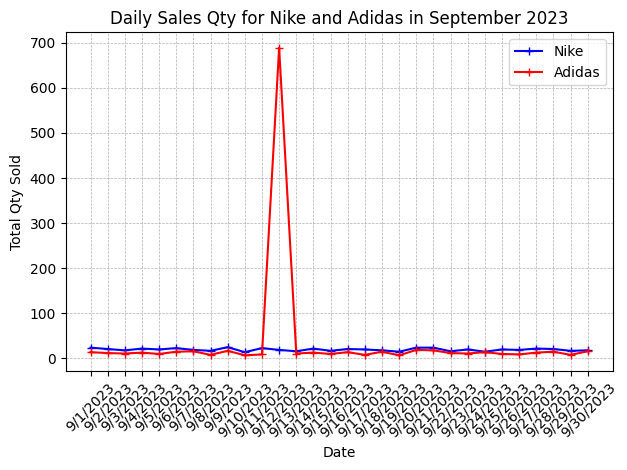

In [39]:
plot_qty()

In [40]:
df_adidas.sold_qty.replace(689,adidas_median,inplace=True)

/var/folders/1d/w72pys2d2q58j17kf_kg6h300000gr/T/ipykernel_22702/673595311.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_adidas.sold_qty.replace(689,adidas_median,inplace=True)
/var/folders/1d/w72pys2d2q58j17kf_kg6h300000gr/T/ipykernel_22702/673595311.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_adidas.sold_qty.replace(689,a

In [41]:
df_adidas.describe()

,sold_qty
count,30.000000
mean,12.233333
std,3.287210
min,7.000000
25%,10.000000
50%,12.000000
75%,14.750000
max,19.000000


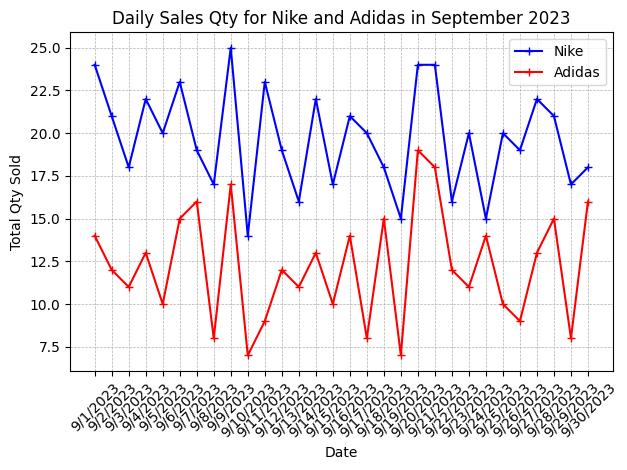

In [42]:
plot_qty()